# ECG Denoising Pipeline Demo
Run the pipeline on the bundled example data.

In [1]:
from pathlib import Path
import json
import numpy as np
from ecg_pipeline import PipelineConfig, load_config_yaml, ECGDenoisingPipeline, plot_signal_with_spans

root = Path('.')
ecg_path = root/'example_data'/'ecg_orig.npy'
gaps_path = root/'example_data'/'gaps_indices.json'
cfg_path = root/'example_data'/'pipeline_config.yaml'

cfg = load_config_yaml(str(cfg_path))
x = np.load(ecg_path)
gaps = json.loads(Path(gaps_path).read_text())

pipe = ECGDenoisingPipeline(cfg)
res = pipe.run(x, gaps)
print({'len_original':len(res.ecg_orig), 'len_start':len(res.ecg_start), 'len_final':len(res.ecg_final)})


{'len_original': 4000, 'len_start': 3818, 'len_final': 3597}


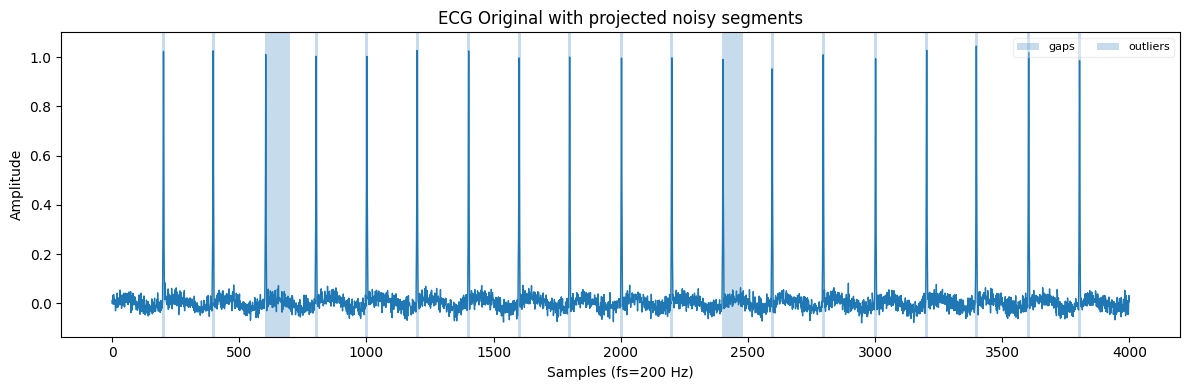

In [2]:
plot_signal_with_spans(
    res.ecg_orig,
    {
        'gaps': res.projected_to_orig['gaps'],
        'outliers': res.projected_to_orig['outliers'],
        'rdropouts': res.projected_to_orig['rdropouts'],
        'motions': res.projected_to_orig['motions'],
    },
    cfg.fs,
    title='ECG Original with projected noisy segments',
    show=True,
)


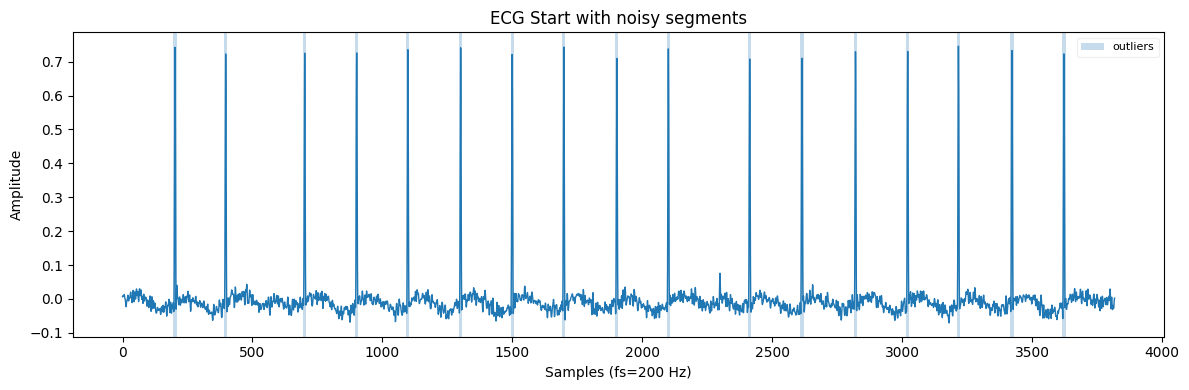

In [3]:
plot_signal_with_spans(
    res.ecg_start,
    {
        'outliers': res.projected_to_start['outliers'],
        'rdropouts': res.projected_to_start['rdropouts'],
        'motions': res.projected_to_start['motions'],
    },
    cfg.fs,
    title='ECG Start with noisy segments',
    show=True,
)
